# View the result of many simulations

In [64]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [65]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [66]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# config LSST

In [67]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [68]:
NBFILT=len(all_filternum)

# Input Data

In [69]:
path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"

In [70]:
dirs = os.listdir(path_data)

In [71]:
selected_files = []
for thefile in dirs:
    if thefile.find("info")!=-1:
        selected_files.append(thefile)

In [72]:
selected_files.sort()


In [73]:
all_data = []
for thefile in selected_files:
    thefullfilename=os.path.join(path_data,thefile)
    data=np.loadtxt(thefullfilename)
    all_data.append(data)

In [74]:
all_data[0].shape

(912, 8)

In [75]:
sed_idx=0

In [76]:
data=all_data[0]

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [77]:
df=pd.DataFrame(data)

In [78]:
df.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

airmass=1.22 $\pm$ 0.13


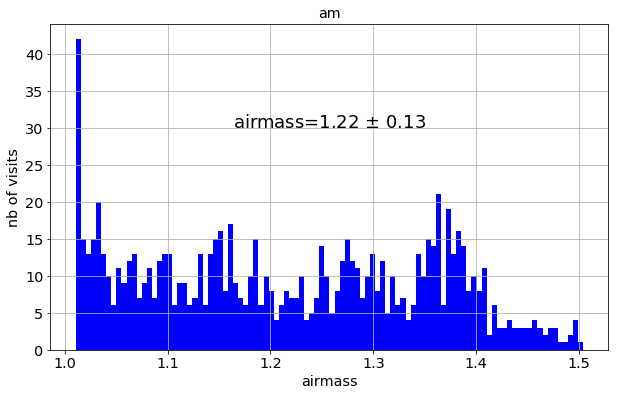

In [79]:
m,sig,zmin,zmax=df["am"].describe()["mean"],df["am"].describe()["std"],df["am"].describe()["min"],df["am"].describe()["max"]
thelabel="airmass={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist("am",bins=100,color='b',label=thelabel)
#axarr = frame.hist(column='Age', by = 'Survived', sharex=True, sharey=True, layout = (2, 1))

for ax in axarr.flatten():
    ax.set_xlabel("airmass")
    ax.set_ylabel("nb of visits")
    ax.text((zmin+zmax)/2., 30, thelabel, ha='center',fontsize=18)
print(thelabel)

In [80]:
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])

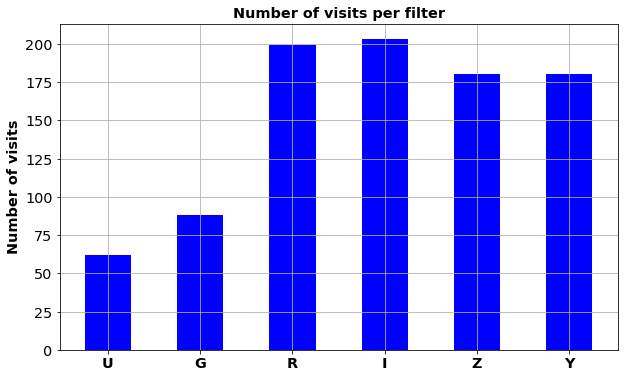

In [81]:
ind = np.arange(6)  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind , Nobs, width, color='Blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of visits',fontweight='bold')
ax.set_title('Number of visits per filter',fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
#ax.legend()
plt.grid()

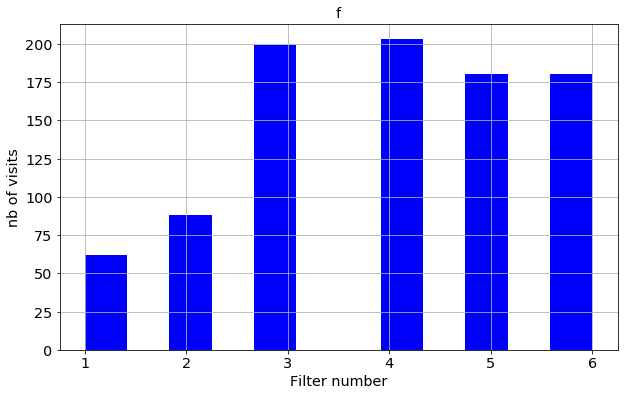

In [82]:
axarr=df.hist("f",bins=12,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("Filter number")
    ax.set_ylabel("nb of visits")

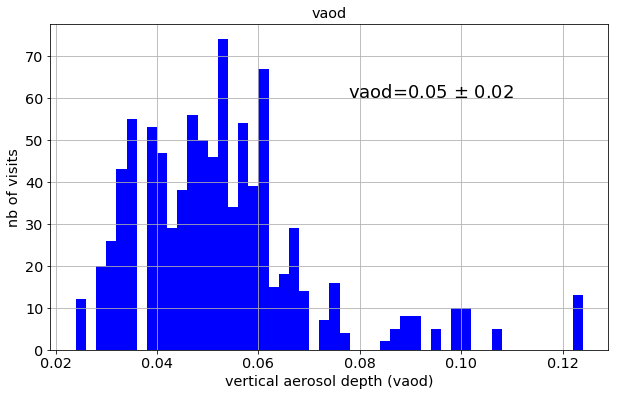

In [83]:
m,sig,amin,amax=df["vaod"].describe()["mean"],df["vaod"].describe()["std"],df["vaod"].describe()["min"],df["vaod"].describe()["max"]
thelabel="vaod={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('vaod',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("vertical aerosol depth (vaod)")
    ax.set_ylabel("nb of visits")
    ax.text((amin+amax)/2.+0.02, 60, thelabel, ha='center',fontsize=18)

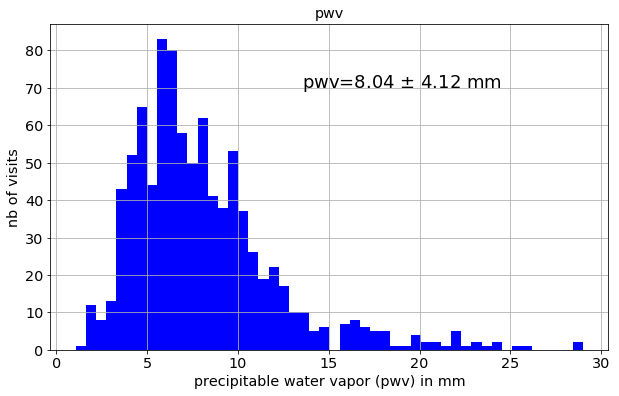

In [84]:
m,sig,pmin,pmax=df["pwv"].describe()["mean"],df["pwv"].describe()["std"],df["pwv"].describe()["min"],df["pwv"].describe()["max"]
thelabel="pwv={:3.2f} $\pm$ {:3.2f} mm".format(m,sig)
axarr=df.hist('pwv',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("precipitable water vapor (pwv) in mm")
    ax.set_ylabel("nb of visits")
    ax.text((pmin+pmax)/2.+4, 70, thelabel, ha='center',fontsize=18)

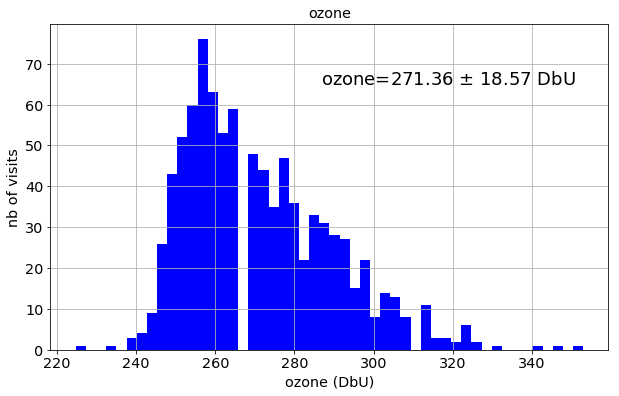

In [85]:
m,sig,omin,omax=df["ozone"].describe()["mean"],df["ozone"].describe()["std"],df["ozone"].describe()["min"],df["ozone"].describe()["max"]
thelabel="ozone={:3.2f} $\pm$ {:3.2f} DbU".format(m,sig)
axarr=df.hist('ozone',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("ozone (DbU)")
    ax.set_ylabel("nb of visits")
    ax.text((omin+omax)/2.+30, 65, thelabel, ha='center',fontsize=18)

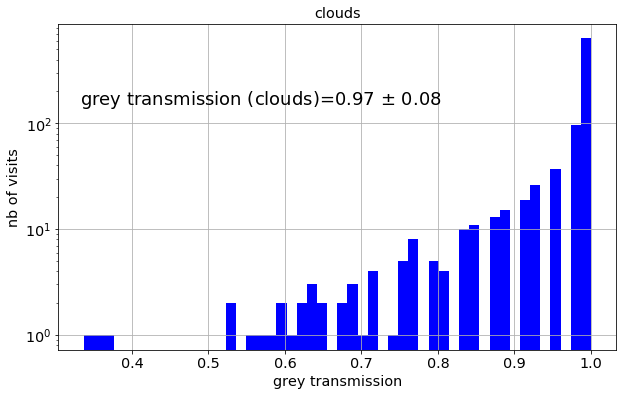

In [86]:
m,sig,cmin,cmax=df["clouds"].describe()["mean"],df["clouds"].describe()["std"],df["clouds"].describe()["min"],df["clouds"].describe()["max"]
thelabel="grey transmission (clouds)={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('clouds',bins=50,color='b')
for ax in axarr.flatten():
    ax.set_xlabel("grey transmission")
    ax.set_ylabel("nb of visits")
    ax.set_yscale('log')
    ax.text((cmin+cmax)/2.-0.1, 150, thelabel, ha='center',fontsize=18)

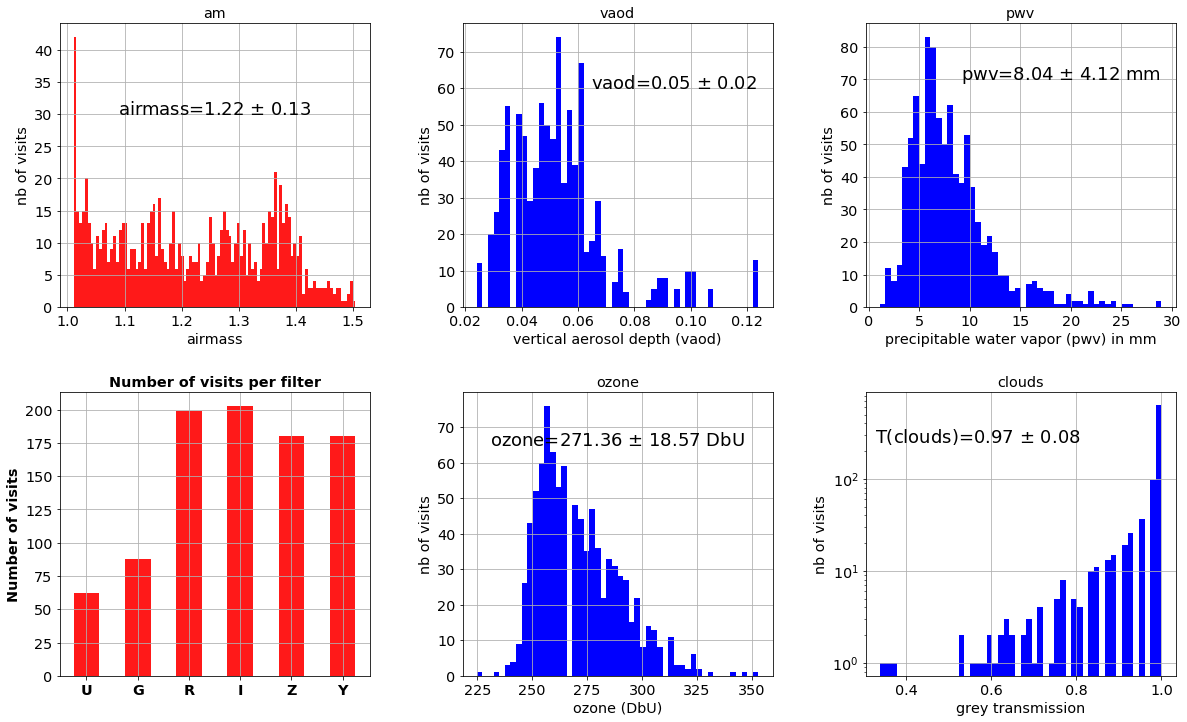

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#airmasses
#=========
m,sig,zmin,zmax=df["am"].describe()["mean"],df["am"].describe()["std"],df["am"].describe()["min"],df["am"].describe()["max"]
thelabel="airmass={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist("am",bins=100,color='r',alpha=0.9,label=thelabel,ax=axes[0,0])
#axarr = frame.hist(column='Age', by = 'Survived', sharex=True, sharey=True, layout = (2, 1))
for ax in axarr.flatten():
    ax.set_xlabel("airmass")
    ax.set_ylabel("nb of visits")
    ax.text((zmin+zmax)/2., 30, thelabel, ha='center',fontsize=18)
# VAOD
#=-----
m,sig,amin,amax=df["vaod"].describe()["mean"],df["vaod"].describe()["std"],df["vaod"].describe()["min"],df["vaod"].describe()["max"]
thelabel="vaod={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('vaod',bins=50,color='b',ax=axes[0,1])
for ax in axarr.flatten():
    ax.set_xlabel("vertical aerosol depth (vaod)")
    ax.set_ylabel("nb of visits")
    ax.text((amin+amax)/2.+0.02, 60, thelabel, ha='center',fontsize=18)
# PWV
#-----
m,sig,pmin,pmax=df["pwv"].describe()["mean"],df["pwv"].describe()["std"],df["pwv"].describe()["min"],df["pwv"].describe()["max"]
thelabel="pwv={:3.2f} $\pm$ {:3.2f} mm".format(m,sig)
axarr=df.hist('pwv',bins=50,color='b',ax=axes[0,2])
for ax in axarr.flatten():
    ax.set_xlabel("precipitable water vapor (pwv) in mm")
    ax.set_ylabel("nb of visits")
    ax.text((pmin+pmax)/2.+4, 70, thelabel, ha='center',fontsize=18)
# Filter
#------
#axarr=df.hist("f",bins=12,color='r',alpha=0.9,ax=axes[1,0])
#for ax in axarr.flatten():
#    ax.set_xlabel("Filter color")
#    ax.set_ylabel("nb of visits")
#    ax.set_xticks(np.arange(6))
#    ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
N_u,N_g,N_r=df["f"][df.f==1].describe()["count"],df["f"][df.f==2].describe()["count"],df["f"][df.f==3].describe()["count"]
N_i,N_z,N_y=df["f"][df.f==4].describe()["count"],df["f"][df.f==5].describe()["count"],df["f"][df.f==6].describe()["count"]
Nobs=np.array([N_u,N_g,N_r,N_i,N_z,N_y])    
ind = np.arange(6)  # the x locations for the groups
width = 0.5  # the width of the bars
ax=axes[1,0]
rects1 = ax.bar(ind , Nobs, width, color='r',alpha=0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of visits',fontweight='bold')
ax.set_title('Number of visits per filter',fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(('U', 'G', 'R', 'I', 'Z','Y'),fontweight='bold')
ax.grid()    
    
# Ozone
#-------
m,sig,omin,omax=df["ozone"].describe()["mean"],df["ozone"].describe()["std"],df["ozone"].describe()["min"],df["ozone"].describe()["max"]
thelabel="ozone={:3.2f} $\pm$ {:3.2f} DbU".format(m,sig)
axarr=df.hist('ozone',bins=50,color='b',ax=axes[1,1])
for ax in axarr.flatten():
    ax.set_xlabel("ozone (DbU)")
    ax.set_ylabel("nb of visits")
    ax.text((omin+omax)/2., 65, thelabel, ha='center',fontsize=18)
# Clouds
#-------
m,sig,cmin,cmax=df["clouds"].describe()["mean"],df["clouds"].describe()["std"],df["clouds"].describe()["min"],df["clouds"].describe()["max"]
thelabel="T(clouds)={:3.2f} $\pm$ {:3.2f}".format(m,sig)
axarr=df.hist('clouds',bins=50,color='b',ax=axes[1,2])
for ax in axarr.flatten():
    ax.set_xlabel("grey transmission")
    ax.set_ylabel("nb of visits")
    ax.set_yscale('log')
    ax.text((cmin+cmax)/2.-0.1, 250, thelabel, ha='center',fontsize=18)






array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98573eb7f0>]], dtype=object)

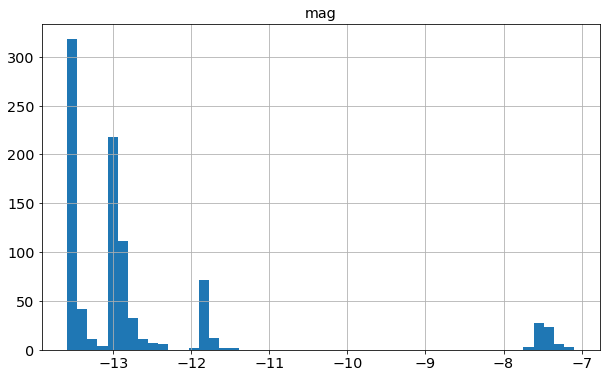

In [88]:
df.hist('mag',bins=50)

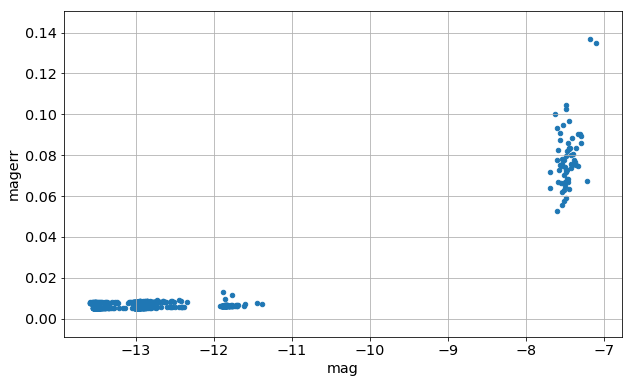

In [89]:
df.plot.scatter(x='mag',y='magerr',grid=True)

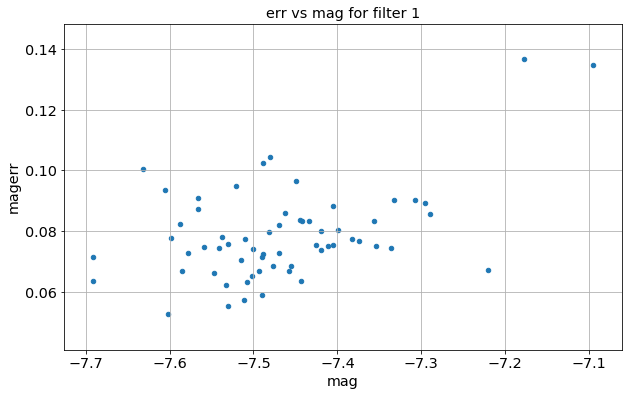

In [90]:
df.loc[(df.f == 1) & (df.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)

In [91]:
len(all_data)

12961

In [92]:
NBSED=len(all_data)

# Concatenate All Data Samples

In [93]:
MAGMIN=[-12.5,-15.,-16.,-16.,-16.,-15.]
MAGMAX=[3.0,-5.0,-6.,-5.,-4.,-2 ]

In [94]:
all_df = []
for ised in np.arange(NBSED):
    df2=pd.DataFrame(all_data[ised])
    df2.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']
    all_df.append(df2)
    
    #df2.loc[(df2.f == 1)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter 1',grid=True)
dft=pd.concat(all_df)


# Plot error vs Magnitude

(-12.5, 3.0)

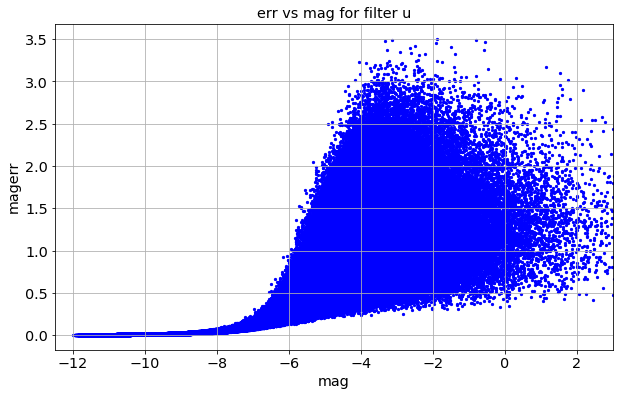

In [95]:
dft.loc[(dft.f == 1)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag for filter u',color='b',grid=True)
plt.xlim(MAGMIN[0],MAGMAX[0])

(-15.0, -5.0)

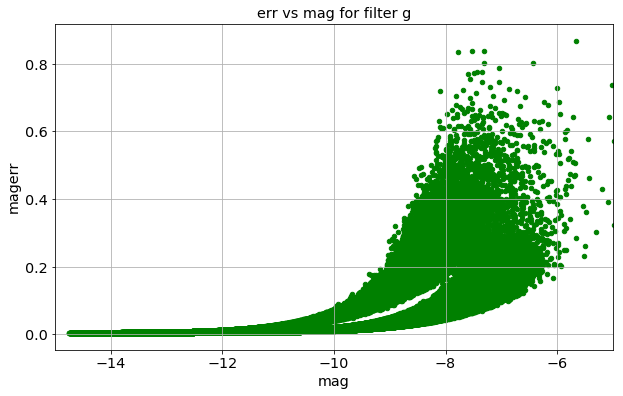

In [96]:
dft.loc[(dft.f == 2)].plot.scatter(x='mag',y='magerr',title='err vs mag for filter g',color='g',grid=True)
plt.xlim(MAGMIN[1],MAGMAX[1])

(-16.0, -6.0)

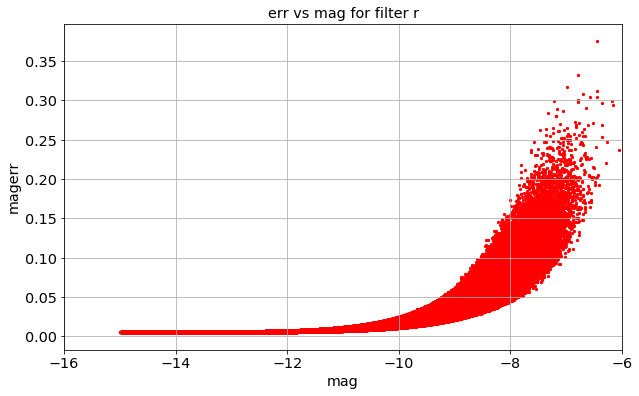

In [97]:
dft.loc[(dft.f == 3)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag for filter r',color='r',grid=True)
plt.xlim(MAGMIN[2],MAGMAX[2])

(-16.0, -5.0)

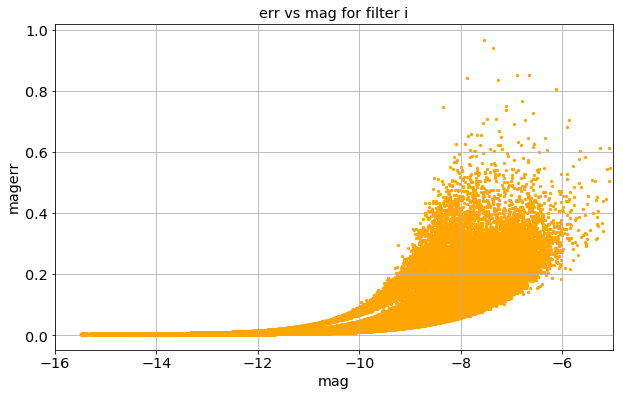

In [98]:
dft.loc[(dft.f == 4)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag for filter i',color='orange',grid=True)
plt.xlim(MAGMIN[3],MAGMAX[3])

(-16.0, -4.0)

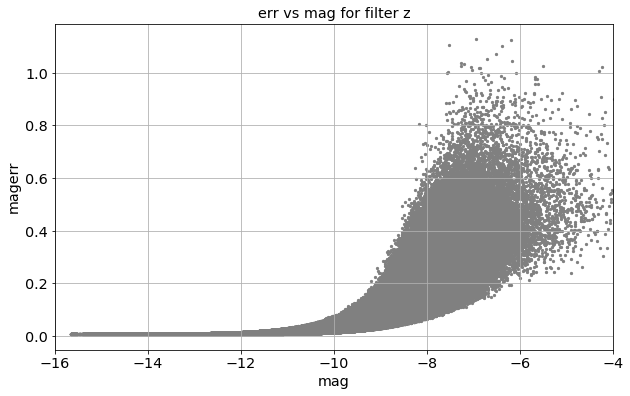

In [99]:
dft.loc[(dft.f == 5)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag for filter z',color='grey',grid=True)
plt.xlim(MAGMIN[4],MAGMAX[4])

(-15.0, -2)

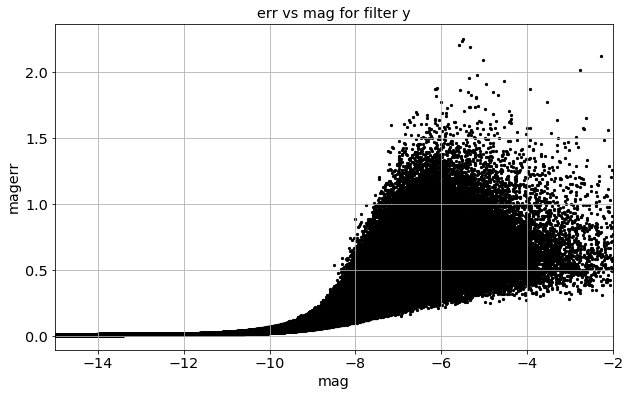

In [100]:
dft.loc[(dft.f == 6)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag for filter y',color='k',grid=True)
plt.xlim(MAGMIN[5],MAGMAX[5])

(-12.5, 3.0)

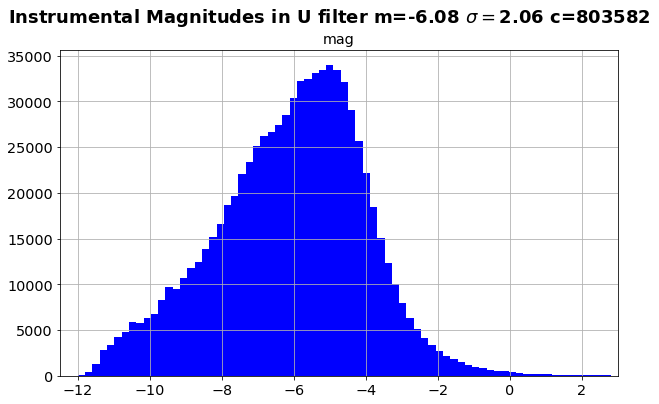

In [101]:
dfu=dft.loc[df['f']==1]
m,sig,c=dfu['mag'].describe()['mean'],dfu['mag'].describe()['std'],int(dfu['mag'].describe()['count'])
dft.loc[(dft.f == 1)].hist('mag',bins=100,grid=True,color='b')
thetitle="Instrumental Magnitudes in U filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[0],MAGMAX[0])

# Plot Magnitudes

(-15.0, -5.0)

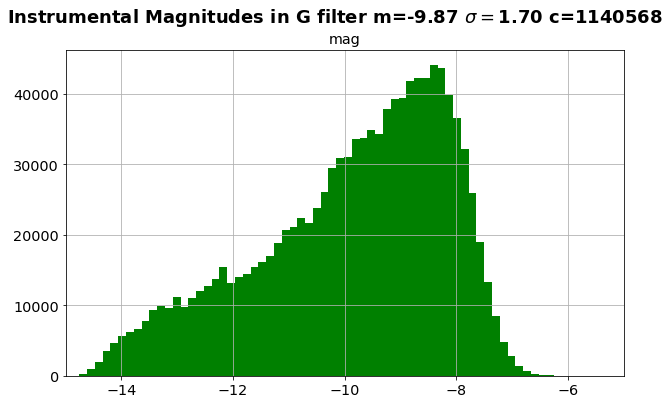

In [102]:
dfg=dft.loc[df['f']==2]
m,sig,c=dfg['mag'].describe()['mean'],dfg['mag'].describe()['std'],int(dfg['mag'].describe()['count'])
dft.loc[(dft.f == 2)].hist('mag',bins=100,grid=True,color='g')
thetitle="Instrumental Magnitudes in G filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[1],MAGMAX[1])

(-16.0, -6.0)

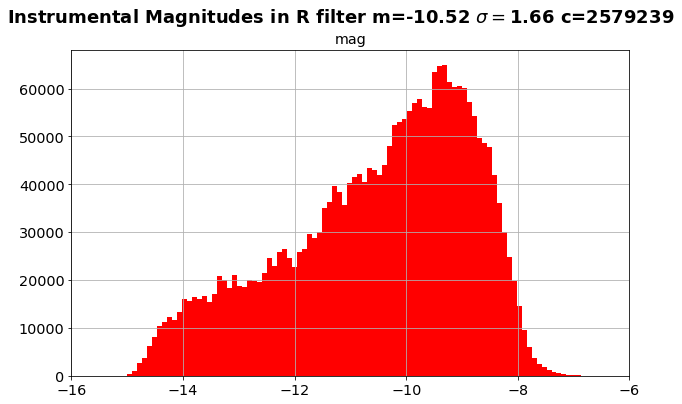

In [103]:
dfr=dft.loc[df['f']==3]
m,sig,c=dfr['mag'].describe()['mean'],dfr['mag'].describe()['std'],int(dfr['mag'].describe()['count'])
dft.loc[(dft.f == 3)].hist('mag',bins=100,grid=True,color='r')
thetitle="Instrumental Magnitudes in R filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[2],MAGMAX[2])

(-16.0, -5.0)

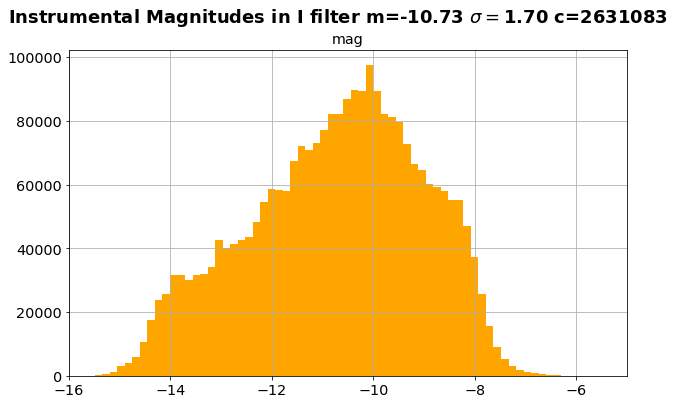

In [104]:
dfi=dft.loc[df['f']==4]
m,sig,c=dfi['mag'].describe()['mean'],dfi['mag'].describe()['std'],int(dfi['mag'].describe()['count'])
dft.loc[(dft.f == 4)].hist('mag',bins=100,grid=True,color='orange')
thetitle="Instrumental Magnitudes in I filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[3],MAGMAX[3])

(-16.0, -4.0)

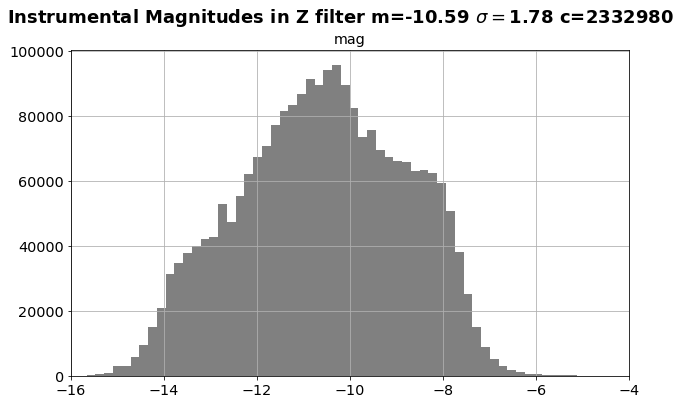

In [105]:
dfz=dft.loc[df['f']==5]
m,sig,c=dfz['mag'].describe()['mean'],dfz['mag'].describe()['std'],int(dfz['mag'].describe()['count'])
dft.loc[(dft.f == 5)].hist('mag',bins=100,grid=True,color='grey')
thetitle="Instrumental Magnitudes in Z filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[4],MAGMAX[4])

(-15.0, -2)

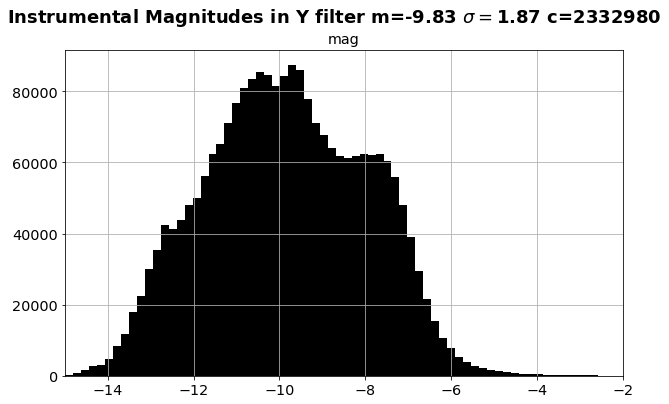

In [106]:
dfy=dft.loc[df['f']==6]
m,sig,c=dfy['mag'].describe()['mean'],dfy['mag'].describe()['std'],int(dfy['mag'].describe()['count'])
dft.loc[(dft.f == 6)].hist('mag',bins=100,grid=True,color='k')

thetitle="Instrumental Magnitudes in Y filter m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
plt.suptitle(thetitle,fontweight='bold',fontsize=18)
plt.xlim(MAGMIN[5],MAGMAX[5])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])
# blue
dfu=dft.loc[df['f']==1]
m,sig,c=dfu['mag'].describe()['mean'],dfu['mag'].describe()['std'],int(dfu['mag'].describe()['count'])
thelabel="U : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 1)].hist('mag',bins=100,ax=axes[0,0],grid=True,color='b')
axes[0,0].set_xlim(MAGMIN[0],MAGMAX[0])
dft.loc[(dft.f == 1)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (u)',ax=axes[1,0],color='b',grid=True)
axes[1,0].set_xlim(MAGMIN[0],MAGMAX[0])
# green
dfg=dft.loc[df['f']==2]
m,sig,c=dfg['mag'].describe()['mean'],dfg['mag'].describe()['std'],int(dfg['mag'].describe()['count'])
thelabel="G : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 2)].hist('mag',bins=100,ax=axes[0,1],grid=True,color='g')
axes[0,1].set_xlim(MAGMIN[1],MAGMAX[1])
dft.loc[(dft.f == 2)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (g)',ax=axes[1,1],color='g',grid=True)
axes[1,1].set_xlim(MAGMIN[1],MAGMAX[1])
#red
dfr=dft.loc[df['f']==3]
m,sig,c=dfr['mag'].describe()['mean'],dfr['mag'].describe()['std'],int(dfr['mag'].describe()['count'])
thelabel="R : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 3)].hist('mag',bins=100,ax=axes[0,2],grid=True,color='r')
axes[0,2].set_xlim(MAGMIN[2],MAGMAX[2])
dft.loc[(dft.f == 3)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (r)',ax=axes[1,2],color='r',grid=True)
axes[1,2].set_xlim(MAGMIN[2],MAGMAX[2])
#
plt.suptitle("Instrumental magnitudes and errors in filters U, G, R",fontweight='bold',fontsize=22)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#
dfi=dft.loc[df['f']==4]
m,sig,c=dfi['mag'].describe()['mean'],dfi['mag'].describe()['std'],int(dfi['mag'].describe()['count'])
thetitle="I : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 4)].hist('mag',bins=100,ax=axes[0,0],grid=True,color='orange')
axes[0,0].set_xlim(MAGMIN[3],MAGMAX[3])
dft.loc[(dft.f == 4)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (y)',ax=axes[1,0],color='orange',grid=True)
axes[1,0].set_xlim(MAGMIN[3],MAGMAX[3])
#
dfz=dft.loc[df['f']==5]
m,sig,c=dfz['mag'].describe()['mean'],dfz['mag'].describe()['std'],int(dfz['mag'].describe()['count'])
thetitle="Z : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 5)].hist('mag',bins=100,ax=axes[0,1],grid=True,color='grey')
axes[0,1].set_xlim(MAGMIN[4],MAGMAX[4])
dft.loc[(dft.f == 5)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (z)',ax=axes[1,1],color='grey',grid=True)
axes[1,1].set_xlim(MAGMIN[4],MAGMAX[4])
#

dfy=dft.loc[df['f']==6]
m,sig,c=dfy['mag'].describe()['mean'],dfy['mag'].describe()['std'],int(dfy['mag'].describe()['count'])
thetitle="Y : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 6)].hist('mag',bins=100,ax=axes[0,2],grid=True,color='k')
axes[0,2].set_xlim(MAGMIN[5],MAGMAX[5])
dft.loc[(dft.f == 6)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (y)',ax=axes[1,2],color='k',grid=True)
axes[1,2].set_xlim(MAGMIN[5],MAGMAX[5])
#
plt.suptitle("Instrumental magnitudes and errors in filters I,Z,Y ",fontweight='bold',fontsize=22)


